## HW2
題目：資料的操作有很多，接下來的馬拉松中我們會介紹常被使用到的操作，參加者不妨先自行想像一下，第一次看到資料，我們一般會想知道什麼訊息？

#### Ex: 如何知道資料的 row 數以及 column 數、有什麼欄位、多少欄位、如何截取部分的資料等等

本次HW以D1作業1選擇的MovieLens 20M Dataset電影評分資料進行分析 https://grouplens.org/datasets/movielens/20m/

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
# 設定 data_path
dir_data = './MovieLens/'

### 第一筆資料 ( Movie)

In [10]:
title = os.path.join(dir_data, 'movies.csv')
print('Path of read in data: %s' % (title))
movie = pd.read_csv(title)

Path of read in data: ./MovieLens/movies.csv


#### 資料的 row 數以及 column 數

In [11]:
movie.shape

(27278, 3)

總共有27278部電影

#### 列出所有欄位

In [12]:
movie.columns

Index(['movieId', 'title', 'genres'], dtype='object')

#### 截取部分資料

In [13]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


每一列資料代表一部電影，其欄位包含：
1. 電影名稱
2. 電影類型（複數，以|分隔），有可能為NA(no genres listed)
兩者皆為類別行資料

In [27]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
movieId    27278 non-null int64
title      27278 non-null object
genres     27278 non-null object
dtypes: int64(1), object(2)
memory usage: 639.4+ KB


資料節無缺漏，但如上述所說，no genres listed 需視為na

In [26]:
movie.tail(20)

,movieId,title,genres
27258,131166,WWII IN HD (2009),(no genres listed)
27259,131168,Phoenix (2014),Drama
27260,131170,Parallels (2015),Sci-Fi
27261,131172,Closed Curtain (2013),(no genres listed)
27262,131174,Gentlemen (2014),Drama|Romance|Thriller
27263,131176,A Second Chance (2014),Drama
27264,131180,Dead Rising: Watchtower (2015),Action|Horror|Thriller
27265,131231,Standby (2014),Comedy|Romance
27266,131237,What Men Talk About (2010),Comedy
27267,131239,Three Quarter Moon (2011),Comedy|Drama


由頭尾的title可見電影涵蓋從1995年至2015年的電影資料

### 第二筆資料 (Ratings)

In [14]:
rate = os.path.join(dir_data, 'ratings.csv')
print('Path of read in data: %s' % (rate))
ratings = pd.read_csv(rate)

Path of read in data: ./MovieLens/ratings.csv


#### 資料的 row 數以及 column 數

In [28]:
ratings.shape

(20000263, 4)

資料包含超過2000萬筆，需慎用

In [15]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [16]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


See how many views of each moview got. (Sort from largest to lowest)

In [29]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


In [22]:
pd.crosstab(ratings['movieId'],columns = 'count',).sort_values('count',ascending = False)

col_0,count
movieId,
296,67310
356,66172
318,63366
593,63299
480,59715
260,54502
110,53769
589,52244
2571,51334


In [37]:
import matplotlib.pyplot as plt


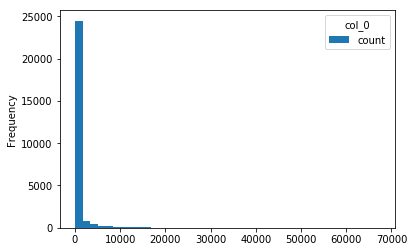

In [40]:
pd.crosstab(ratings['movieId'],columns = 'count',).sort_values('count',ascending = False).plot(kind = 'hist',bins = 40)
plt.show()

大部分的資料（將近25000筆）只有不到5000的ratings